In [1]:
import pandas as pd 

#### Series

In [2]:
# Let's create a series 
data = pd.Series([10,20,30,40])
print(data)

0    10
1    20
2    30
3    40
dtype: int64


In [3]:
data = pd.Series([10,20,30,40], index= ['a','b','c','d'])
print(data)

a    10
b    20
c    30
d    40
dtype: int64


####  Dataframe

In [4]:
data = {
    'NAME':['Nirav','Thapa','Pirate'],
    "Age":[18,19,20],
    'City':['NewYork', 'London', 'Paris']
}
df = pd.DataFrame(data)
print(df)

     NAME  Age     City
0   Nirav   18  NewYork
1   Thapa   19   London
2  Pirate   20    Paris


In [5]:
data = [['Alice', 25], ['Bob', 30], ['Charlie', 35]]
df = pd.DataFrame(data, columns=['Name', 'Age'])
print(df)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


#### CSV and Excel files


In [6]:
# Save to CSV
df.to_csv('output.csv', index=False)
# Save to Excel
df.to_excel('output.xlsx', index=False)

In [7]:
# Read a CSV file
df = pd.read_csv('output.csv')
# Read an Excel file
df = pd.read_excel('output.xlsx')

#### Viewing data


In [8]:
print(df.head(2))
print()
print(df.tail(2))

    Name  Age
0  Alice   25
1    Bob   30

      Name  Age
1      Bob   30
2  Charlie   35


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes
None


In [10]:
print(df.describe())

        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


#### Selecting data

In [11]:
# Single column (returns a Series)
ages = df['Age']
# Multiple columns (returns a DataFrame)
subset = df[['Name', 'Age']]

In [12]:
# Using .loc (label-based)
row = df.loc[[0,1]]  # First row
print(row)
# Using .iloc (position-based)
# row = df.iloc[0]
# row

    Name  Age
0  Alice   25
1    Bob   30


In [13]:
# Get rows where Age > 30
filtered = df[df['Age'] > 30]
print(filtered)

      Name  Age
2  Charlie   35


#### Modifying data

In [14]:
df['Pagar']= [10000,20000,1000]
df

,Name,Age,Pagar
0,Alice,25,10000
1,Bob,30,20000
2,Charlie,35,1000


In [15]:
df['Pagar'] = df['Pagar']+ 100
df

,Name,Age,Pagar
0,Alice,25,10100
1,Bob,30,20100
2,Charlie,35,1100


In [16]:
data = {'Name':['Alice', 'Bob', None], 'Age': [25, None, 35]}
df = pd.DataFrame(data)

In [17]:
print(df.isna()) # this will show true where there is null value 

    Name    Age
0  False  False
1  False   True
2   True  False


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Name'] = df['Name'].fillna('Anonymous')
df

,Name,Age
0,Alice,25.0
1,Bob,30.0
2,Anonymous,35.0


In [19]:
# df = df.dropna()  this is to drop the null values from the file it will drop the entire row

#### Grouping and Aggregating

In [20]:
df['Department'] = ['HR', 'IT', 'HR']
# Group by Department and calculate mean Age
grouped = df.groupby('Department')['Age'].mean()
print(grouped)

Department
HR    30.0
IT    30.0
Name: Age, dtype: float64


In [21]:
df

,Name,Age,Department
0,Alice,25.0,HR
1,Bob,30.0,IT
2,Anonymous,35.0,HR


#### Meerging data

In [22]:
#Concatenate the data
df1 = pd.DataFrame({'Name': ['Alice'], 'Age': [25]})
df2 = pd.DataFrame({'Name': ['Bob'], 'Age': [30]})
combined = pd.concat([df1, df2], ignore_index=True)
combined

,Name,Age
0,Alice,25
1,Bob,30


In [23]:
df1 = pd.DataFrame({'Name': ['Alice', 'Bob'], 'ID': [1, 2]})
df2 = pd.DataFrame({'ID': [1, 2], 'Salary': [50000, 60000]})
merged = pd.merge(df1, df2, on='ID')
print(merged)

    Name  ID  Salary
0  Alice   1   50000
1    Bob   2   60000


### Data Preprocessing

In [24]:
data = {
    'NAME':['Nirav','Thapa','Pirate'],
    "Age":[18,19,20],
    'City':['NewYork', 'London', 'Paris']
}
df = pd.DataFrame(data)
print(df)

     NAME  Age     City
0   Nirav   18  NewYork
1   Thapa   19   London
2  Pirate   20    Paris


In [25]:
df_encoded = pd.get_dummies(df, columns=['City'])
print(df_encoded)
print()
print(df)

     NAME  Age  City_London  City_NewYork  City_Paris
0   Nirav   18        False          True       False
1   Thapa   19         True         False       False
2  Pirate   20        False         False        True

     NAME  Age     City
0   Nirav   18  NewYork
1   Thapa   19   London
2  Pirate   20    Paris


In [26]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Adult', 'Senior'])

In [27]:
df

,NAME,Age,City,Age_Group
0,Nirav,18,NewYork,Young
1,Thapa,19,London,Young
2,Pirate,20,Paris,Young


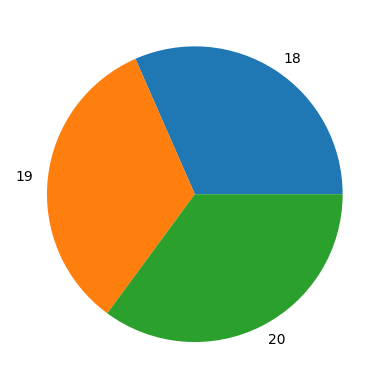

In [34]:
import matplotlib.pyplot as plt
plt.pie(df['Age'], labels=[18,19,20])
plt.show()

In [38]:
import pandas as pd

# Load data
df = pd.read_csv('customers.csv')

# Step 1: Explore data
print(df.head())
print(df.info())
print(df.describe())

# Step 2: Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Income'] = df['Income'].fillna(df['Income'].median())

# Step 3: Remove duplicates
df = df.drop_duplicates()

# Step 4: Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'City'])

# Step 5: Filter outliers
df = df[df['Age'] < 100]

# Step 6: Create features
df['Income_per_Age'] = df['Income'] / df['Age']

# Step 7: Prepare for ML
X = df.drop('Target', axis=1).to_numpy()  # Features
y = df['Target'].to_numpy()  # Labels

# Step 8: Save cleaned data
# df.to_csv('cleaned_customers.csv', index=False)

   CustomerID     Name   Age  Gender      City   Income    Education  \
0           1    Alice  25.0    Male  New York  50000.0  High School   
1           2      Bob  30.0  Female    London  60000.0   Bachelor’s   
2           3  Charlie  35.0    Male     Paris  75000.0     Master’s   
3           4    Diana   NaN  Female     Tokyo  45000.0   Bachelor’s   
4           5     Emma  28.0    Male  New York  52000.0  High School   

  Purchase_Date Product_Category  Target  
0    2023-01-15      Electronics       1  
1    2023-02-20         Clothing       0  
2    2023-03-10            Books       1  
3    2023-04-05      Electronics       0  
4    2023-05-12         Clothing       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        20 non-null     int64  
 1   Name              20 non-null     object 
 2   Age          

In [43]:
df = pd.read_csv('customers.csv')
dfgc = pd.get_dummies(df, columns=['Gender', 'City'])
df

,CustomerID,Name,Age,Gender,City,Income,Education,Purchase_Date,Product_Category,Target
0,1,Alice,25.0,Male,New York,50000.0,High School,2023-01-15,Electronics,1
1,2,Bob,30.0,Female,London,60000.0,Bachelor’s,2023-02-20,Clothing,0
2,3,Charlie,35.0,Male,Paris,75000.0,Master’s,2023-03-10,Books,1
3,4,Diana,NaN,Female,Tokyo,45000.0,Bachelor’s,2023-04-05,Electronics,0
4,5,Emma,28.0,Male,New York,52000.0,High School,2023-05-12,Clothing,1
5,6,Frank,40.0,Female,London,NaN,Master’s,2023-06-18,Books,1
6,7,Grace,32.0,Male,Paris,68000.0,Bachelor’s,2023-07-22,Electronics,0
7,8,Henry,27.0,Female,Tokyo,47000.0,High School,2023-08-30,Clothing,1
8,9,Isabella,45.0,Male,New York,80000.0,Master’s,2023-09-14,Books,0
9,10,Jack,33.0,Female,London,55000.0,Bachelor’s,2023-10-01,Electronics,1


### Correlattion 
In Pandas, correlation refers to the statistical relationship between two or more variables — specifically, how they change together.

📌 DataFrame.corr() in Pandas:
This method calculates the Pearson correlation coefficient between numeric columns.

### 

In [1]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Horsepower': [130, 250, 190, 300],
    'Price': [20000, 50000, 30000, 60000],
    'Mileage': [30, 20, 25, 15]
})

# Compute correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

            Horsepower     Price   Mileage
Horsepower    1.000000  0.991515 -0.999078
Price         0.991515  1.000000 -0.989949
Mileage      -0.999078 -0.989949  1.000000
